In [1]:
import pandas as pd

In [2]:
headlines = pd.read_csv('Data/headlines.csv')

headlines.head()

,index,Unnamed: 0,url,headline_no_site,site,time,country,bias
0,0,0,https://www.iol.co.za/entertainment/movies-the...,'Lady Bird' buzzes through young sexuality,iol.co.za,2018-02-23 08:00:00+00:00,South Africa,0.000000
1,1,1,https://www.iol.co.za/entertainment/music/the-...,The shadowy urban POP super Starrah who loves ...,iol.co.za,2018-01-10 08:00:00+00:00,South Africa,0.166667
2,2,2,https://www.iol.co.za/entertainment/celebrity-...,Rihanna pens heartfelt tribute to her mom in b...,iol.co.za,2018-02-21 08:00:00+00:00,South Africa,0.333333
3,3,3,https://www.iol.co.za/news/south-africa/wester...,Shock as woman accused of killing teen girlfri...,iol.co.za,2018-02-27 08:00:00+00:00,South Africa,0.333333
4,4,4,https://www.iol.co.za/business-report/careers/...,TOP STORY: Meet South Africa's new first lady ...,iol.co.za,2018-02-15 08:00:00+00:00,South Africa,0.166667


In [3]:
# Dropping irrelevant columns url, unnamed, and index
headlines = headlines.drop(columns=['url', 'Unnamed: 0', 'index'])

In [4]:
headlines.head()

,headline_no_site,site,time,country,bias
0,'Lady Bird' buzzes through young sexuality,iol.co.za,2018-02-23 08:00:00+00:00,South Africa,0.000000
1,The shadowy urban POP super Starrah who loves ...,iol.co.za,2018-01-10 08:00:00+00:00,South Africa,0.166667
2,Rihanna pens heartfelt tribute to her mom in b...,iol.co.za,2018-02-21 08:00:00+00:00,South Africa,0.333333
3,Shock as woman accused of killing teen girlfri...,iol.co.za,2018-02-27 08:00:00+00:00,South Africa,0.333333
4,TOP STORY: Meet South Africa's new first lady ...,iol.co.za,2018-02-15 08:00:00+00:00,South Africa,0.166667


In [5]:
headlines.shape

(382139, 5)

In [6]:
# Getting value counts for bias feature
headlines['bias'].value_counts()

bias
0.166667    265271
0.000000     57227
0.333333     52629
0.500000      6408
0.666667       568
0.833333        35
1.000000         1
Name: count, dtype: int64

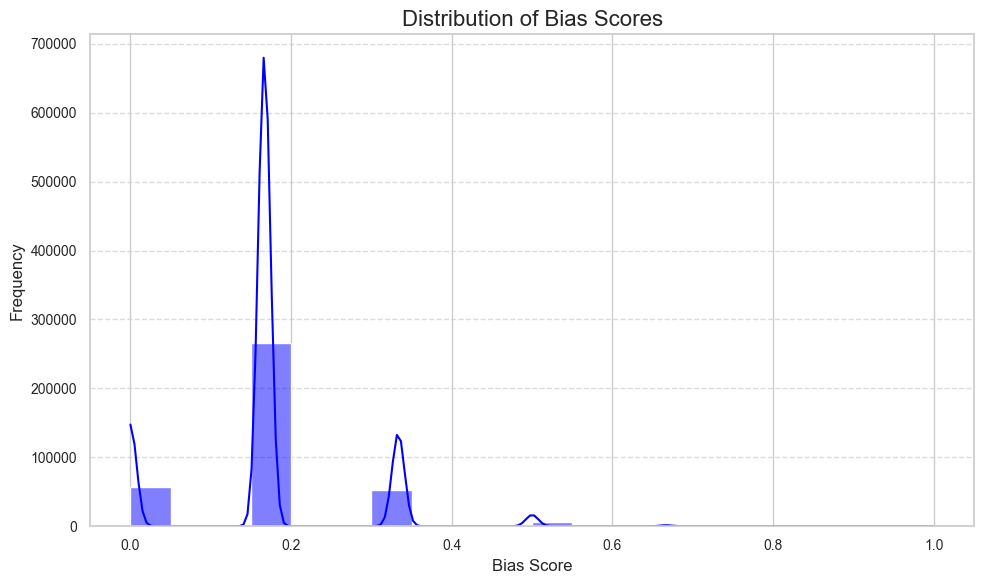

In [7]:
# Plotting bias distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Plot histogram of 'bias'
plt.figure(figsize=(10, 6))
sns.histplot(headlines['bias'], bins=20, kde=True, color='blue')

# Style the plot
plt.title('Distribution of Bias Scores', fontsize=16)
plt.xlabel('Bias Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [8]:
# Creating feature 'sentiment_polarity'
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply the sentiment analyzer to each headline and store the compound score
headlines['sentiment_polarity'] = headlines['headline_no_site'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [9]:
headlines.head()

,headline_no_site,site,time,country,bias,sentiment_polarity
0,'Lady Bird' buzzes through young sexuality,iol.co.za,2018-02-23 08:00:00+00:00,South Africa,0.000000,0.0000
1,The shadowy urban POP super Starrah who loves ...,iol.co.za,2018-01-10 08:00:00+00:00,South Africa,0.166667,0.8225
2,Rihanna pens heartfelt tribute to her mom in b...,iol.co.za,2018-02-21 08:00:00+00:00,South Africa,0.333333,0.5423
3,Shock as woman accused of killing teen girlfri...,iol.co.za,2018-02-27 08:00:00+00:00,South Africa,0.333333,-0.7184
4,TOP STORY: Meet South Africa's new first lady ...,iol.co.za,2018-02-15 08:00:00+00:00,South Africa,0.166667,0.3680


In [10]:
headlines['bias'].head()

0    0.000000
1    0.166667
2    0.333333
3    0.333333
4    0.166667
Name: bias, dtype: float64

In [11]:
headlines['sentiment_polarity'].value_counts()

sentiment_polarity
 0.0000    127683
-0.2960      6871
 0.4019      5231
-0.4767      4682
-0.3182      4423
            ...  
 0.6075         1
-0.4690         1
 0.5991         1
 0.7854         1
 0.4388         1
Name: count, Length: 4977, dtype: int64

In [12]:
# Print min and max values for sentiment polarity
print(headlines['sentiment_polarity'].min())
print(headlines['sentiment_polarity'].max())

-0.979
0.9682


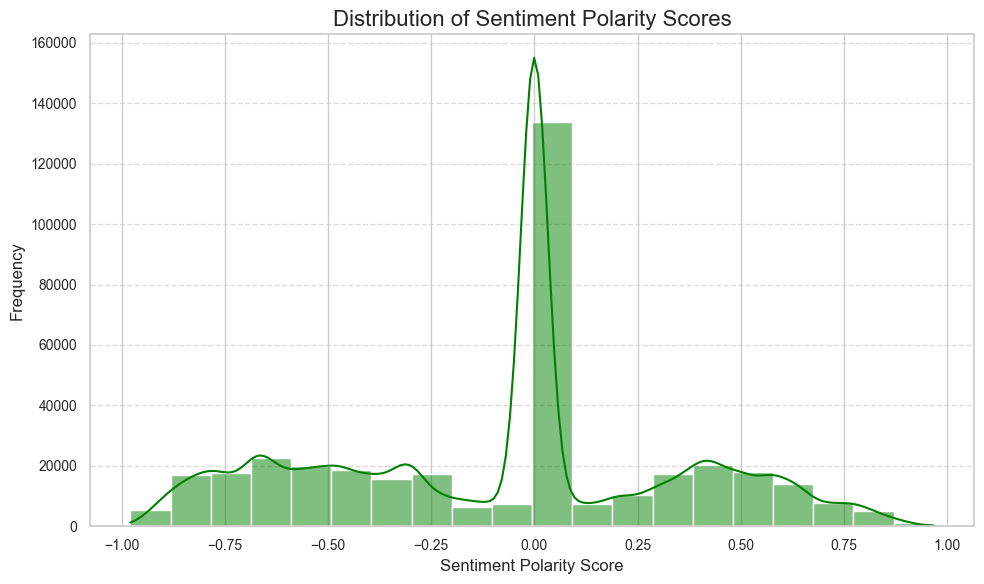

In [13]:
# Plotting dist of sentiment polarity

# Set Seaborn style
sns.set(style="whitegrid")

# Plot histogram of 'sentiment_polarity'
plt.figure(figsize=(10, 6))
sns.histplot(headlines['sentiment_polarity'], bins=20, kde=True, color='green')

# Style the plot
plt.title('Distribution of Sentiment Polarity Scores', fontsize=16)
plt.xlabel('Sentiment Polarity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [14]:
import datetime
# Date Features
headlines['Day_of_Week'] = pd.to_datetime(headlines['time']).dt.day_name()
headlines['Month'] = pd.to_datetime(headlines['time']).dt.month
# Time feature
headlines['Hour_of_Day'] = pd.to_datetime(headlines['time']).dt.hour
# Assuming 'time' is the feature containing datetime information
headlines['time'] = pd.to_datetime(headlines['time'], errors='coerce')
# Extract the year and create a new feature 'Publication_Year'
headlines['Publication_Year'] = headlines['time'].dt.year

In [15]:
# Dropping time column
headlines = headlines.drop(columns=['time'])

In [16]:
headlines.head()

,headline_no_site,site,country,bias,sentiment_polarity,Day_of_Week,Month,Hour_of_Day,Publication_Year
0,'Lady Bird' buzzes through young sexuality,iol.co.za,South Africa,0.000000,0.0000,Friday,2,8,2018
1,The shadowy urban POP super Starrah who loves ...,iol.co.za,South Africa,0.166667,0.8225,Wednesday,1,8,2018
2,Rihanna pens heartfelt tribute to her mom in b...,iol.co.za,South Africa,0.333333,0.5423,Wednesday,2,8,2018
3,Shock as woman accused of killing teen girlfri...,iol.co.za,South Africa,0.333333,-0.7184,Tuesday,2,8,2018
4,TOP STORY: Meet South Africa's new first lady ...,iol.co.za,South Africa,0.166667,0.3680,Thursday,2,8,2018


In [17]:
# Creating word count feature
headlines['Word_Count'] = headlines['headline_no_site'].apply(lambda x: len(x.split()))
# Creating text length feature
headlines['Text_Length'] = headlines['headline_no_site'].apply(len)

In [18]:
headlines.head()

,headline_no_site,site,country,bias,sentiment_polarity,Day_of_Week,Month,Hour_of_Day,Publication_Year,Word_Count,Text_Length
0,'Lady Bird' buzzes through young sexuality,iol.co.za,South Africa,0.000000,0.0000,Friday,2,8,2018,6,42
1,The shadowy urban POP super Starrah who loves ...,iol.co.za,South Africa,0.166667,0.8225,Wednesday,1,8,2018,10,57
2,Rihanna pens heartfelt tribute to her mom in b...,iol.co.za,South Africa,0.333333,0.5423,Wednesday,2,8,2018,10,58
3,Shock as woman accused of killing teen girlfri...,iol.co.za,South Africa,0.333333,-0.7184,Tuesday,2,8,2018,11,65
4,TOP STORY: Meet South Africa's new first lady ...,iol.co.za,South Africa,0.166667,0.3680,Thursday,2,8,2018,10,62


In [19]:
headlines['country'].value_counts()

country
India           138590
USA             115669
UK              109286
South Africa     18594
Name: count, dtype: int64

In [20]:
headlines['site'].value_counts()

site
dailymail.co.uk    8219
telegraph.co.uk    7596
abcnews.go.com     6305
indiatimes.com     6269
mirror.co.uk       6207
                   ... 
news.google.com       4
makeuseof.com         3
howtogeek.com         3
pcadvisor.co.uk       1
dailysun.co.za        1
Name: count, Length: 186, dtype: int64

In [21]:
# Assuming 'headlines' is the name of your dataframe
min_headlines_threshold = 5000
top_sites = headlines['site'].value_counts()
top_sites = top_sites[top_sites >= min_headlines_threshold].index

# Create a new dataframe with only the sites with at least 5000 headlines
headlines_filtered = headlines[headlines['site'].isin(top_sites)].copy()

In [22]:
headlines_filtered.shape

(117949, 11)

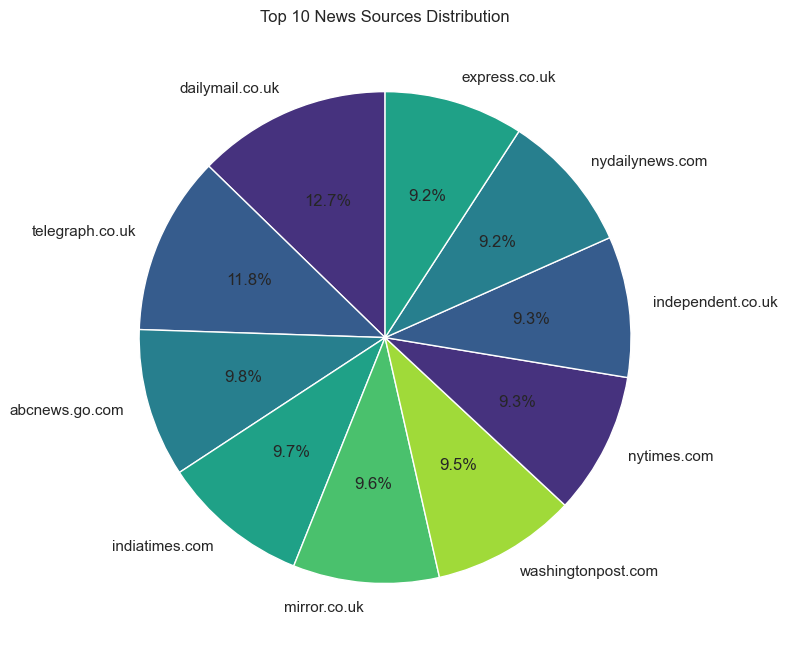

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'headlines_filtered' is the name of your dataframe
top_10_sites = headlines_filtered['site'].value_counts().nlargest(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_sites, labels=top_10_sites.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
plt.title('Top 10 News Sources Distribution')
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/xl/6sfvtvk54y1982txcc62tyqw0000gn/T/ipykernel_5090/2630809544.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='country', data=headlines_filtered, palette='viridis')


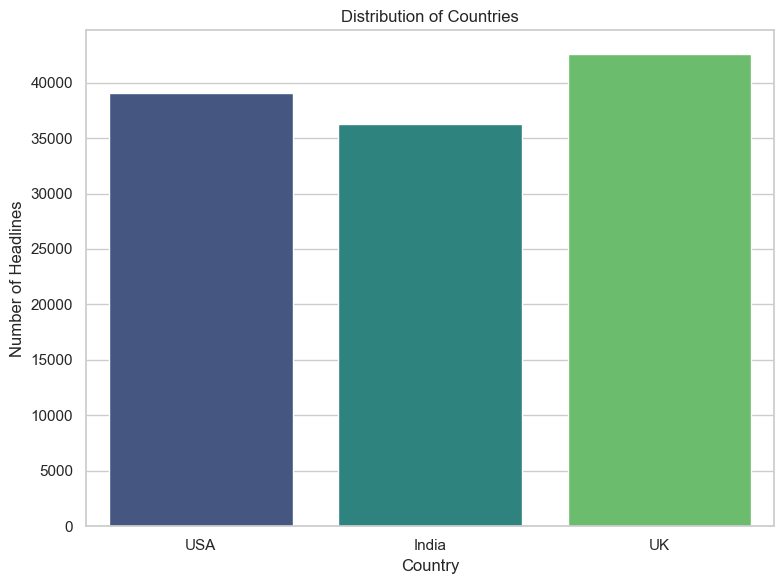

In [24]:
# Assuming 'headlines_filtered' is the name of your dataframe
plt.figure(figsize=(8, 6))
sns.countplot(x='country', data=headlines_filtered, palette='viridis')
plt.title('Distribution of Countries')
plt.xlabel('Country')
plt.ylabel('Number of Headlines')
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
headlines_filtered.head()

,headline_no_site,site,country,bias,sentiment_polarity,Day_of_Week,Month,Hour_of_Day,Publication_Year,Word_Count,Text_Length
9207,Mother and Daughter Reunite After 82 Years,abcnews.go.com,USA,0.333333,0.0000,Wednesday,2,8,2016,7,42
9208,Hayden Panettiere 'Happy' to Stand Up for Wome...,abcnews.go.com,USA,0.166667,-0.5719,Tuesday,1,8,2016,11,74
9209,Woman Gets Trendy Tattoo to 'Caution' People S...,abcnews.go.com,USA,0.333333,0.0000,Saturday,2,8,2016,12,66
9210,Timeline of Alleged Abduction and Slaying of 1...,abcnews.go.com,USA,0.166667,-0.5859,Wednesday,2,8,2016,12,70
9211,"Unabomber Ted Kaczynski's Brother, Sister in L...",abcnews.go.com,USA,0.166667,0.0000,Wednesday,2,8,2016,13,77


In [26]:
headlines_filtered['bias'].value_counts()

bias
0.166667    79211
0.333333    18478
0.000000    17353
0.500000     2629
0.666667      262
0.833333       16
Name: count, dtype: int64

In [27]:
import numpy as np
# Assuming 'headlines_filtered' is your DataFrame
conditions = [
    headlines_filtered['bias'].between(0.000000, 0.2, inclusive='both'),
    headlines_filtered['bias'].between(0.2, 0.4, inclusive='both'),
    headlines_filtered['bias'].between(0.4, 0.6, inclusive='both'),
    headlines_filtered['bias'].between(0.6, 0.8, inclusive='both'),
    headlines_filtered['bias'].between(0.8, 1.0, inclusive='both'),
]

labels = ['No Bias', 'Low Bias', 'Moderate Bias', 'Medium Bias', 'High Bias']

headlines_filtered['bias_category'] = np.select(conditions, labels, default=None)


In [28]:
headlines_filtered.head()

,headline_no_site,site,country,bias,sentiment_polarity,Day_of_Week,Month,Hour_of_Day,Publication_Year,Word_Count,Text_Length,bias_category
9207,Mother and Daughter Reunite After 82 Years,abcnews.go.com,USA,0.333333,0.0000,Wednesday,2,8,2016,7,42,Low Bias
9208,Hayden Panettiere 'Happy' to Stand Up for Wome...,abcnews.go.com,USA,0.166667,-0.5719,Tuesday,1,8,2016,11,74,No Bias
9209,Woman Gets Trendy Tattoo to 'Caution' People S...,abcnews.go.com,USA,0.333333,0.0000,Saturday,2,8,2016,12,66,Low Bias
9210,Timeline of Alleged Abduction and Slaying of 1...,abcnews.go.com,USA,0.166667,-0.5859,Wednesday,2,8,2016,12,70,No Bias
9211,"Unabomber Ted Kaczynski's Brother, Sister in L...",abcnews.go.com,USA,0.166667,0.0000,Wednesday,2,8,2016,13,77,No Bias


In [29]:
headlines_filtered['bias_category'].value_counts()

bias_category
No Bias          96564
Low Bias         18478
Moderate Bias     2629
Medium Bias        262
High Bias           16
Name: count, dtype: int64

In [30]:
# Dropping original bias column
headlines_filtered = headlines_filtered.drop(columns=['bias'])

In [31]:
headlines_filtered.head()

,headline_no_site,site,country,sentiment_polarity,Day_of_Week,Month,Hour_of_Day,Publication_Year,Word_Count,Text_Length,bias_category
9207,Mother and Daughter Reunite After 82 Years,abcnews.go.com,USA,0.0000,Wednesday,2,8,2016,7,42,Low Bias
9208,Hayden Panettiere 'Happy' to Stand Up for Wome...,abcnews.go.com,USA,-0.5719,Tuesday,1,8,2016,11,74,No Bias
9209,Woman Gets Trendy Tattoo to 'Caution' People S...,abcnews.go.com,USA,0.0000,Saturday,2,8,2016,12,66,Low Bias
9210,Timeline of Alleged Abduction and Slaying of 1...,abcnews.go.com,USA,-0.5859,Wednesday,2,8,2016,12,70,No Bias
9211,"Unabomber Ted Kaczynski's Brother, Sister in L...",abcnews.go.com,USA,0.0000,Wednesday,2,8,2016,13,77,No Bias


In [32]:
headlines_filtered.isnull().sum()

headline_no_site      0
site                  0
country               0
sentiment_polarity    0
Day_of_Week           0
Month                 0
Hour_of_Day           0
Publication_Year      0
Word_Count            0
Text_Length           0
bias_category         0
dtype: int64

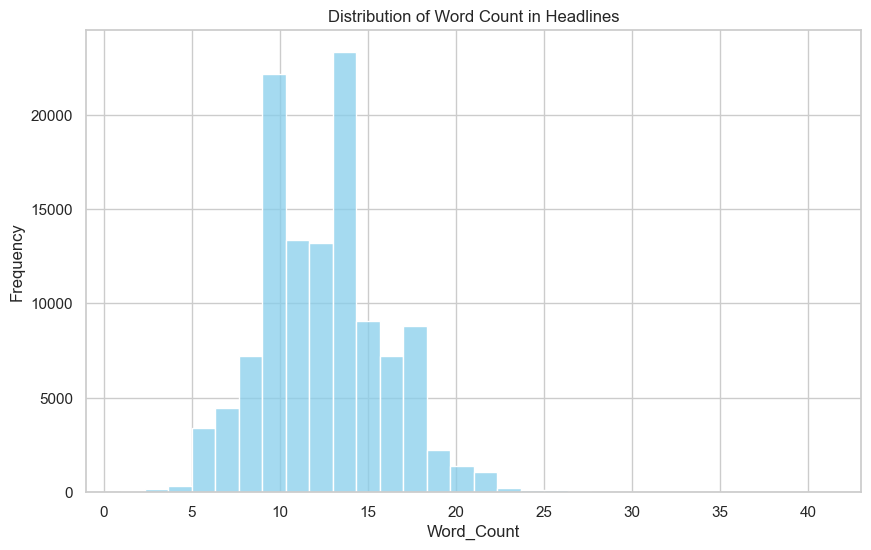

In [33]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(headlines_filtered['Word_Count'], bins=30, color='skyblue', kde=False)
plt.title('Distribution of Word Count in Headlines')
plt.xlabel('Word_Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

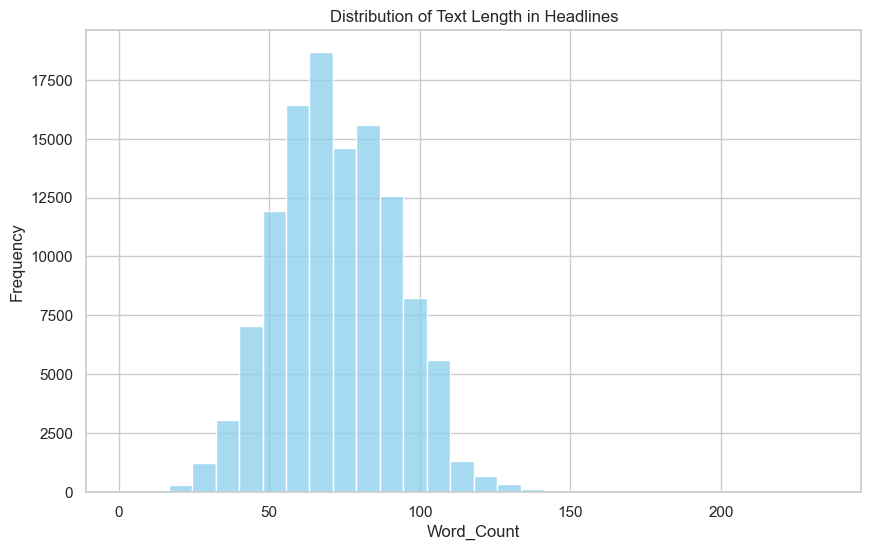

In [34]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(headlines_filtered['Text_Length'], bins=30, color='skyblue', kde=False)
plt.title('Distribution of Text Length in Headlines')
plt.xlabel('Word_Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

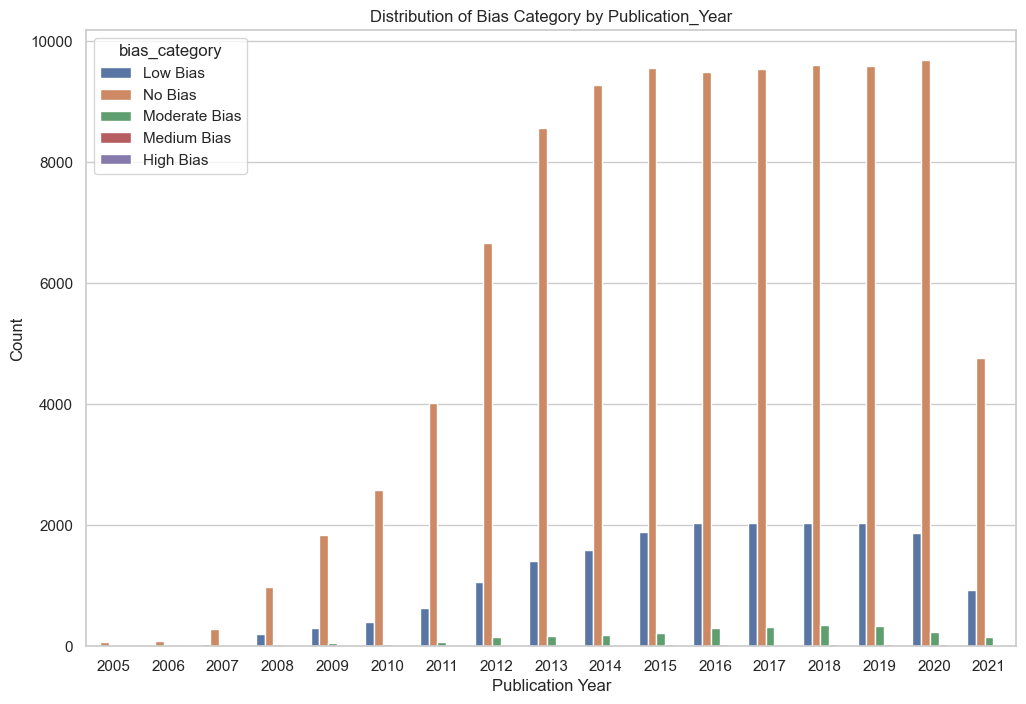

In [35]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting the distribution of bias_category by Publication_Year
plt.figure(figsize=(12, 8))
sns.countplot(x="Publication_Year", hue="bias_category", data=headlines_filtered)
plt.title('Distribution of Bias Category by Publication_Year')
plt.xlabel('Publication Year')
plt.ylabel('Count')

# Show the plot
plt.show()

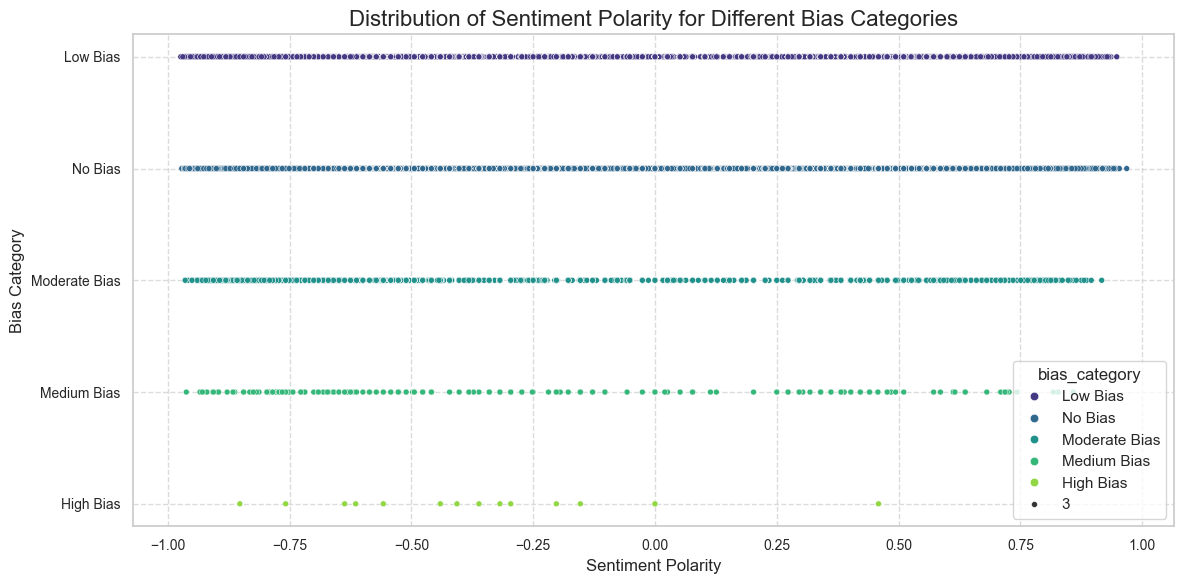

In [36]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Plot a swarm plot for Sentiment_Polarity vs. bias with a gradient color scheme
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='sentiment_polarity', y='bias_category', data=headlines_filtered, hue='bias_category', palette='viridis', size=3)

# Style the plot
plt.title('Distribution of Sentiment Polarity for Different Bias Categories', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=12)
plt.ylabel('Bias Category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([])  # Set an empty array

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
# Select the categorical columns to one-hot encode
categorical_columns = ['site', 'country', 'Day_of_Week', 'Month', 'Hour_of_Day', 'Publication_Year']

# Create one-hot encoded columns with 1s and 0s
one_hot_encoded = pd.get_dummies(headlines_filtered[categorical_columns], drop_first=True, dtype=int)

# Concatenate the one-hot encoded columns with the original DataFrame
headlines_filtered_encoded = pd.concat([headlines_filtered, one_hot_encoded], axis=1)

# Drop the original categorical columns
headlines_filtered_encoded.drop(categorical_columns, axis=1, inplace=True)

# Display the resulting DataFrame
headlines_filtered_encoded.head()


,headline_no_site,sentiment_polarity,Word_Count,Text_Length,bias_category,site_businessinsider.com,site_dailymail.co.uk,site_dnaindia.com,site_eonline.com,site_express.co.uk,...,site_usmagazine.com,site_washingtonpost.com,country_UK,country_USA,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
9207,Mother and Daughter Reunite After 82 Years,0.0000,7,42,Low Bias,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9208,Hayden Panettiere 'Happy' to Stand Up for Wome...,-0.5719,11,74,No Bias,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9209,Woman Gets Trendy Tattoo to 'Caution' People S...,0.0000,12,66,Low Bias,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9210,Timeline of Alleged Abduction and Slaying of 1...,-0.5859,12,70,No Bias,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9211,"Unabomber Ted Kaczynski's Brother, Sister in L...",0.0000,13,77,No Bias,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [38]:
# Rename the 'headlines_no_site' column to 'headlines'
headlines_filtered_encoded.rename(columns={'headline_no_site': 'headlines'}, inplace=True)

headlines_filtered_encoded.head()

,headlines,sentiment_polarity,Word_Count,Text_Length,bias_category,site_businessinsider.com,site_dailymail.co.uk,site_dnaindia.com,site_eonline.com,site_express.co.uk,...,site_usmagazine.com,site_washingtonpost.com,country_UK,country_USA,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
9207,Mother and Daughter Reunite After 82 Years,0.0000,7,42,Low Bias,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9208,Hayden Panettiere 'Happy' to Stand Up for Wome...,-0.5719,11,74,No Bias,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9209,Woman Gets Trendy Tattoo to 'Caution' People S...,0.0000,12,66,Low Bias,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9210,Timeline of Alleged Abduction and Slaying of 1...,-0.5859,12,70,No Bias,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9211,"Unabomber Ted Kaczynski's Brother, Sister in L...",0.0000,13,77,No Bias,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [39]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Tokenize the headline text
headlines_filtered_encoded['tokenized_text'] = headlines_filtered_encoded['headlines'].apply(word_tokenize)

# Remove non-alphabetic characters, handle empty strings, and extra spaces
headlines_filtered_encoded['cleaned_text'] = headlines_filtered_encoded['tokenized_text'].apply(lambda tokens: [re.sub(r'[^a-zA-Z0-9]', '', token).strip() for token in tokens if re.sub(r'[^a-zA-Z0-9]', '', token).strip()])

# Convert to lowercase
headlines_filtered_encoded['cleaned_text'] = headlines_filtered_encoded['cleaned_text'].apply(lambda tokens: [token.lower() for token in tokens])

# Lemmatization
lemmatizer = WordNetLemmatizer()
headlines_filtered_encoded['lemmatized_text'] = headlines_filtered_encoded['cleaned_text'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])


In [40]:
headlines_filtered_encoded.head()

,headlines,sentiment_polarity,Word_Count,Text_Length,bias_category,site_businessinsider.com,site_dailymail.co.uk,site_dnaindia.com,site_eonline.com,site_express.co.uk,...,country_USA,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,tokenized_text,cleaned_text,lemmatized_text
9207,Mother and Daughter Reunite After 82 Years,0.0000,7,42,Low Bias,0,0,0,0,0,...,1,0,0,0,0,0,1,"[Mother, and, Daughter, Reunite, After, 82, Ye...","[mother, and, daughter, reunite, after, 82, ye...","[mother, and, daughter, reunite, after, 82, year]"
9208,Hayden Panettiere 'Happy' to Stand Up for Wome...,-0.5719,11,74,No Bias,0,0,0,0,0,...,1,0,0,0,0,1,0,"[Hayden, Panettiere, 'Happy, ', to, Stand, Up,...","[hayden, panettiere, happy, to, stand, up, for...","[hayden, panettiere, happy, to, stand, up, for..."
9209,Woman Gets Trendy Tattoo to 'Caution' People S...,0.0000,12,66,Low Bias,0,0,0,0,0,...,1,0,1,0,0,0,0,"[Woman, Gets, Trendy, Tattoo, to, 'Caution, ',...","[woman, gets, trendy, tattoo, to, caution, peo...","[woman, get, trendy, tattoo, to, caution, peop..."
9210,Timeline of Alleged Abduction and Slaying of 1...,-0.5859,12,70,No Bias,0,0,0,0,0,...,1,0,0,0,0,0,1,"[Timeline, of, Alleged, Abduction, and, Slayin...","[timeline, of, alleged, abduction, and, slayin...","[timeline, of, alleged, abduction, and, slayin..."
9211,"Unabomber Ted Kaczynski's Brother, Sister in L...",0.0000,13,77,No Bias,0,0,0,0,0,...,1,0,0,0,0,0,1,"[Unabomber, Ted, Kaczynski, 's, Brother, ,, Si...","[unabomber, ted, kaczynski, s, brother, sister...","[unabomber, ted, kaczynski, s, brother, sister..."


In [41]:
lemmatized_df = headlines_filtered_encoded.copy()

In [42]:
# Drop the 'headlines' column from lemmatized_df
lemmatized_df.drop('headlines', axis=1, inplace=True)

# Display the first few rows of lemmatized_df after dropping the column
lemmatized_df.head()


,sentiment_polarity,Word_Count,Text_Length,bias_category,site_businessinsider.com,site_dailymail.co.uk,site_dnaindia.com,site_eonline.com,site_express.co.uk,site_forbes.com,...,country_USA,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,tokenized_text,cleaned_text,lemmatized_text
9207,0.0000,7,42,Low Bias,0,0,0,0,0,0,...,1,0,0,0,0,0,1,"[Mother, and, Daughter, Reunite, After, 82, Ye...","[mother, and, daughter, reunite, after, 82, ye...","[mother, and, daughter, reunite, after, 82, year]"
9208,-0.5719,11,74,No Bias,0,0,0,0,0,0,...,1,0,0,0,0,1,0,"[Hayden, Panettiere, 'Happy, ', to, Stand, Up,...","[hayden, panettiere, happy, to, stand, up, for...","[hayden, panettiere, happy, to, stand, up, for..."
9209,0.0000,12,66,Low Bias,0,0,0,0,0,0,...,1,0,1,0,0,0,0,"[Woman, Gets, Trendy, Tattoo, to, 'Caution, ',...","[woman, gets, trendy, tattoo, to, caution, peo...","[woman, get, trendy, tattoo, to, caution, peop..."
9210,-0.5859,12,70,No Bias,0,0,0,0,0,0,...,1,0,0,0,0,0,1,"[Timeline, of, Alleged, Abduction, and, Slayin...","[timeline, of, alleged, abduction, and, slayin...","[timeline, of, alleged, abduction, and, slayin..."
9211,0.0000,13,77,No Bias,0,0,0,0,0,0,...,1,0,0,0,0,0,1,"[Unabomber, Ted, Kaczynski, 's, Brother, ,, Si...","[unabomber, ted, kaczynski, s, brother, sister...","[unabomber, ted, kaczynski, s, brother, sister..."


remove stopwords

In [43]:
from nltk.corpus import stopwords

# Get the stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the lemmatized_text column
lemmatized_df['lemmatized_text_no_stopwords'] = lemmatized_df['lemmatized_text'].apply(lambda tokens: [token for token in tokens if token not in stop_words])


In [44]:
lemmatized_df['lemmatized_text_no_stopwords'].head()

9207                [mother, daughter, reunite, 82, year]
9208    [hayden, panettiere, happy, stand, woman, post...
9209    [woman, get, trendy, tattoo, caution, people, ...
9210    [timeline, alleged, abduction, slaying, 13, ye...
9211    [unabomber, ted, kaczynski, brother, sister, l...
Name: lemmatized_text_no_stopwords, dtype: object

In [45]:
lemmatized_df.head()

,sentiment_polarity,Word_Count,Text_Length,bias_category,site_businessinsider.com,site_dailymail.co.uk,site_dnaindia.com,site_eonline.com,site_express.co.uk,site_forbes.com,...,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,tokenized_text,cleaned_text,lemmatized_text,lemmatized_text_no_stopwords
9207,0.0000,7,42,Low Bias,0,0,0,0,0,0,...,0,0,0,0,0,1,"[Mother, and, Daughter, Reunite, After, 82, Ye...","[mother, and, daughter, reunite, after, 82, ye...","[mother, and, daughter, reunite, after, 82, year]","[mother, daughter, reunite, 82, year]"
9208,-0.5719,11,74,No Bias,0,0,0,0,0,0,...,0,0,0,0,1,0,"[Hayden, Panettiere, 'Happy, ', to, Stand, Up,...","[hayden, panettiere, happy, to, stand, up, for...","[hayden, panettiere, happy, to, stand, up, for...","[hayden, panettiere, happy, stand, woman, post..."
9209,0.0000,12,66,Low Bias,0,0,0,0,0,0,...,0,1,0,0,0,0,"[Woman, Gets, Trendy, Tattoo, to, 'Caution, ',...","[woman, gets, trendy, tattoo, to, caution, peo...","[woman, get, trendy, tattoo, to, caution, peop...","[woman, get, trendy, tattoo, caution, people, ..."
9210,-0.5859,12,70,No Bias,0,0,0,0,0,0,...,0,0,0,0,0,1,"[Timeline, of, Alleged, Abduction, and, Slayin...","[timeline, of, alleged, abduction, and, slayin...","[timeline, of, alleged, abduction, and, slayin...","[timeline, alleged, abduction, slaying, 13, ye..."
9211,0.0000,13,77,No Bias,0,0,0,0,0,0,...,0,0,0,0,0,1,"[Unabomber, Ted, Kaczynski, 's, Brother, ,, Si...","[unabomber, ted, kaczynski, s, brother, sister...","[unabomber, ted, kaczynski, s, brother, sister...","[unabomber, ted, kaczynski, brother, sister, l..."


In [46]:
df_to_vectorize = lemmatized_df.copy()

In [47]:
# List of columns to drop
columns_to_drop = ['tokenized_text', 'cleaned_text', 'lemmatized_text']

# Drop the specified columns
df_to_vectorize.drop(columns=columns_to_drop, inplace=True)

In [48]:
df_to_vectorize.head()

,sentiment_polarity,Word_Count,Text_Length,bias_category,site_businessinsider.com,site_dailymail.co.uk,site_dnaindia.com,site_eonline.com,site_express.co.uk,site_forbes.com,...,site_washingtonpost.com,country_UK,country_USA,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,lemmatized_text_no_stopwords
9207,0.0000,7,42,Low Bias,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,"[mother, daughter, reunite, 82, year]"
9208,-0.5719,11,74,No Bias,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,"[hayden, panettiere, happy, stand, woman, post..."
9209,0.0000,12,66,Low Bias,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,"[woman, get, trendy, tattoo, caution, people, ..."
9210,-0.5859,12,70,No Bias,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,"[timeline, alleged, abduction, slaying, 13, ye..."
9211,0.0000,13,77,No Bias,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,"[unabomber, ted, kaczynski, brother, sister, l..."


In [55]:
from gensim.models import Word2Vec

# Assuming df_to_vectorize is your DataFrame
def tokenize_text(text):
    try:
        # Check if the input is a string before tokenizing
        if isinstance(text, str):
            return word_tokenize(text)
        else:
            return []  # Return an empty list for non-string values
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []

# Apply the custom tokenization function to the 'lemmatized_text_no_stopwords' column
sentences = df_to_vectorize['lemmatized_text_no_stopwords'].apply(tokenize_text).tolist()

print(sentences[:5])  # Print the first 5 sentences to check if they are valid

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, epochs=10)

print("Model trained successfully")

# Save the trained model to a file
word2vec_model.save('word2vec_model.bin')


[[], [], [], [], []]


RuntimeError: you must first build vocabulary before training the model